In [1]:
%load_ext autoreload
%autoreload 2

#Packages
import numpy as np
import matplotlib.pyplot as plt

#.py
from core import qlearning as q 

In [3]:
aggregated_agents = []
for nb_players in [2, 3, 4, 5]:
    total_rewards = []

    for loop in range(3):
        print("Loop:", loop)
        agents = [q.Agent(nb_players=nb_players) for _ in range(nb_players)]
        env = q.Env(nb_players=nb_players)

        temps = []
        rewards = []
        epsilon = []
        prices = []

        # Initialisation des prix p0 (on va le faire directement dans chaque agent)
        for agent in agents:
            agent.p = np.random.choice(agent.A)

        # Initialisation de l'état
        s_t = env([agent.p for agent in agents])[1]
        for agent in agents:
            agent.s_t = s_t

        s_ind = agents[0].find_index(agents[0].s_t)
        for agent in agents:
            agent.s_ind = s_ind

        # Phase itérative
        for t in range(6):
            # Actions et état t+1
            for agent in agents:
                agent.a_ind = agent.get_next_action()

            s_t1 = env([agent.A[agent.a_ind] for agent in agents])[1]
            for agent in agents:
                agent.s_t1 = s_t1

            s_ind1 = agents[0].find_index(agents[0].s_t1)
            for agent in agents:
                agent.s_ind1 = s_ind1

            temps.append(t)
            ret = env(s_t1)
            quant, price, cost = ret

            re = ret[0]*ret[1]-ret[0]*ret[2]
            rewards.append(re)
            epsilon_values = [agent.epsilon for agent in agents]
            epsilon.append(epsilon_values)
            prices.append([agent.p for agent in agents])

            for i, agent in enumerate(agents):
                agent.updateQ(q=quant[i], p=price[i], c=cost[i], t=t)

        total_rewards.append(rewards)

    aggregated_agents.append(np.array(total_rewards).mean(axis=0))

Loop: 0
Loop: 1
Loop: 2
Loop: 0
Loop: 1
Loop: 2
Loop: 0
Loop: 1
Loop: 2
Loop: 0
Loop: 1
Loop: 2


In [4]:
aggregated_agents

[array([[0.36192255, 0.16977708],
        [0.28257008, 0.29274412],
        [0.35346663, 0.12784742],
        [0.3054125 , 0.28635301],
        [0.27090651, 0.29562656],
        [0.26258519, 0.34106348]]),
 array([[0.14363331, 0.23048685, 0.19782742],
        [0.20322718, 0.10748406, 0.09312173],
        [0.23211073, 0.14417663, 0.14254255],
        [0.14126541, 0.27490851, 0.17830034],
        [0.18693573, 0.20292767, 0.20936399],
        [0.09346517, 0.16787365, 0.27064894]]),
 array([[0.1345859 , 0.14363199, 0.17059167, 0.20059278],
        [0.0862237 , 0.19396133, 0.08343667, 0.11532411],
        [0.10157237, 0.11316273, 0.05903624, 0.09839722],
        [0.13921568, 0.10693948, 0.12286403, 0.12256923],
        [0.10577526, 0.07659512, 0.15251882, 0.17901754],
        [0.0868103 , 0.18525415, 0.08768388, 0.11034799]]),
 array([[0.12813031, 0.12877645, 0.04060911, 0.05660015, 0.13333379],
        [0.11525226, 0.10725248, 0.13823737, 0.0578506 , 0.09187455],
        [0.05021052, 0.059

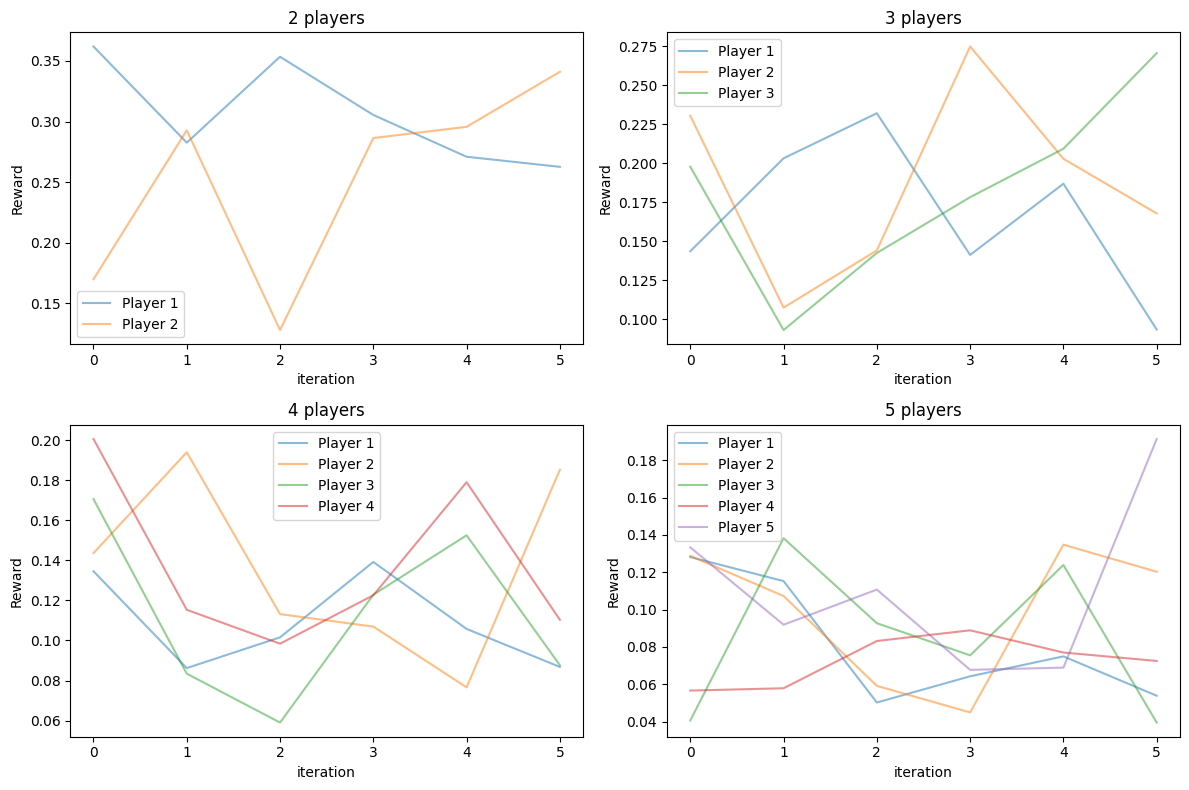

In [7]:
num_graphs = len(aggregated_agents)

# Create a figure with a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Flatten the axes array to iterate over the subplots
axes = axes.flatten()

# Loop to iterate through the periods and subplots
for graph_num in range(num_graphs):
    ax = axes[graph_num]
    num_players = len(aggregated_agents[graph_num][0])
    # Plot curves for each player in the subplot
    for player in range(num_players):
        ax.plot(aggregated_agents[graph_num][:, player], alpha=0.5, label=f'Player {player+1}')
    
    # Set the title of the subplot with the corresponding period
    ax.set_title(f'{graph_num+2} players')
    
    # Add a legend to the subplot
    ax.legend()
    
    # Set the labels of the subplot
    ax.set_xlabel('iteration')
    ax.set_ylabel('Reward')

# Remove any unused subplots
if num_graphs < 4:
    for i in range(num_graphs, 4):
        fig.delaxes(axes[i])

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

In [22]:
nb_players = 5
RN = []
RC = []
for i in range (2,nb_players+1):
    prices = res.PriceOptimizer(nb_players=i)
    collusion_profit, collusion_prices = prices.CollusionPrice()
    nash_profit, nash_prices = prices.NashPrice()
    RN.append(nash_profit)
    RC.append(collusion_profit)
    
Rmean = np.zeros((len(aggregated_agents), 2))
DRmean = np.zeros((len(aggregated_agents), 2))   
    
for i in range (len(aggregated_agents)): 
    for j in range (2):
        Rmean[i][j] = aggregated_agents[i][-2:,j].mean()
        DRmean[i][j] = (Rmean[i][j] - RN[i])/(RC[i] - RN[i]) 

print(DRmean)

[[ 0.54121218  0.72132228]
 [ 0.17144463  0.70460075]
 [ 0.13292279  0.29311104]
 [-0.01292532  0.46889204]]


[0.63126723 0.43802269 0.21301691 0.22798336]


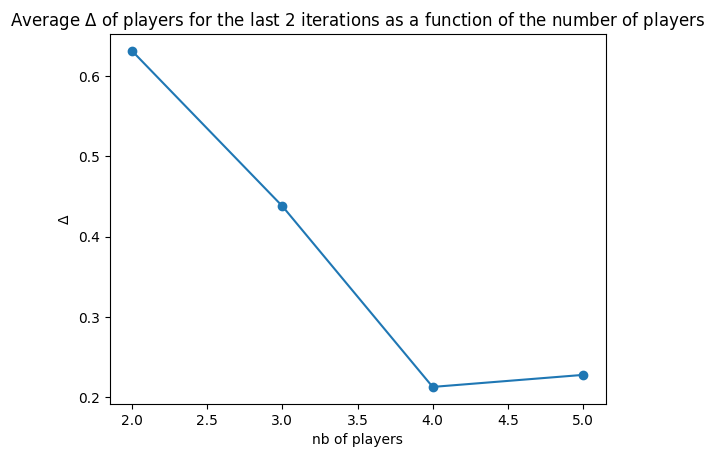

In [25]:
av = np.mean(DRmean, axis=1)
print(av)
plt.plot([2,3,4,5],av, linestyle='-', marker='o')
plt.xlabel('nb of players')
plt.ylabel('$\\Delta$')
plt.title('Average $\\Delta$ of players for the last 2 iterations as a function of the number of players')
plt.show()